### Dataset Headings and Explanations  

 1.⁠ ⁠UserID:  
   - Description: A unique identifier assigned to each customer for differentiation.  
   - Purpose: Not directly relevant for analysis but essential for keeping track of individual entries.  
   - Example Values: 1, 2, 3, etc.

 2.⁠ ⁠CustomerAge:  
   - Description: The age of the customer in years.  
   - Purpose: Helps in analyzing age-related trends in churn behavior. Different age groups may exhibit varying loyalty patterns.  
   - Example Values: 55, 28, 65.

 3.⁠ ⁠Sex:  
   - Description: The gender of the customer (e.g., Male, Female).  
   - Purpose: Useful for identifying if gender influences customer engagement or churn.  
   - Example Values: Male, Female.

 4.⁠ ⁠Tenure:  
   - Description: The duration (in months) the customer has been associated with the platform.  
   - Purpose: Indicates customer loyalty over time. Longer tenure often correlates with lower churn but not always.  
   - Example Values: 20, 27, 60.

 5.⁠ ⁠ServiceUsageRate:  
   - Description: A measure of how often the customer uses the platform’s services, typically monthly.  
   - Purpose: Identifies high or low usage trends that may correlate with churn risk.  
   - Example Values: 24, 30, 17.  

 6.⁠ ⁠SupportCalls:  
   - Description: The number of customer support calls made by the user.  
   - Purpose: High frequency may indicate dissatisfaction, while no calls could signify disengagement or satisfaction.  
   - Example Values: 4, 7, 8.

 7.⁠ ⁠BillingDelay:  
   - Description: Instances or frequency of delays in billing or payment issues (measured in days).  
   - Purpose: Highlights potential friction points that could contribute to customer dissatisfaction.  
   - Example Values: 6, 5, 16.

 8.⁠ ⁠PlanType:  
   - Description: The type of subscription or plan chosen by the customer (e.g., Basic, Standard, Premium).  
   - Purpose: Helps in understanding whether specific plans have higher churn rates.  
   - Example Values: Standard, Premium, Basic.

 9.⁠ ⁠AgreementDuration:  
   - Description: The type of payment agreement or contract duration (e.g., Monthly, Quarterly, Annual).  
   - Purpose: Reveals whether short-term or long-term agreements affect retention and churn.  
   - Example Values: Monthly, Quarterly, Annual.

10.⁠ ⁠TotalExpenditure:  
    - Description: The total amount spent by the customer during their tenure on the platform (in currency units).  
    - Purpose: Indicates customer value; higher expenditure may correlate with loyalty or dissatisfaction if churn occurs.  
    - Example Values: 635, 631, 314.

11.⁠ ⁠RecentActivity:  
    - Description: The most recent interaction or activity level of the customer on the platform (measured in days since last interaction).  
    - Purpose: Identifies engagement trends; higher values may indicate disengagement, a potential churn signal.  
    - Example Values: 25, 10, 1.

12.⁠ ⁠Churn:  
    - Description: A binary indicator showing whether the customer has churned (1 = Yes, 0 = No).  
    - Purpose: Target variable for analysis. Understanding the factors that drive this outcome is key to the project.  
    - Example Values: 0, 1.

### Step 1: Load and Inspect the Data

We will first load the data and inspect its structure, followed by performing basic cleaning if necessary.

In [1]:
import pandas as pd


In [2]:
# Load the dataset
data = pd.read_csv('D:\IIT_U\Strategy Storm 2025 - Round 2 dataset - SSDataset.csv.csv')


<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\rutik\AppData\Local\Temp\ipykernel_27892\3716468568.py:2: SyntaxWarning: invalid escape sequence '\I'
  data = pd.read_csv('D:\IIT_U\Strategy Storm 2025 - Round 2 dataset - SSDataset.csv.csv')


In [3]:
# Check the first few rows
data.head()

,UserID,CustomerAge,Sex,Tenure,ServiceUsageRate,SupportCalls,BillingDelay,PlanType,AgreementDuration,TotalExpenditure,RecentActivity,Churn
0,1,55,Male,20,24,4,6,Standard,Monthly,635,25,0
1,2,28,Male,27,30,4,5,Premium,Quarterly,631,10,0
2,3,65,Female,60,17,7,16,Premium,Quarterly,314,1,1
3,4,53,Male,47,16,8,7,Premium,Annual,527,13,0
4,5,32,Male,56,5,7,15,Premium,Annual,236,25,0


### Step 2: Data Cleaning
Check for missing values and any inconsistencies in the data. Handle missing values by either imputing or removing the rows/columns.

In [4]:
# Check for missing values
data.isnull().sum()

# Handle missing values (example: dropping rows with missing values)
data_cleaned = data.dropna()


In [5]:
data_cleaned

,UserID,CustomerAge,Sex,Tenure,ServiceUsageRate,SupportCalls,BillingDelay,PlanType,AgreementDuration,TotalExpenditure,RecentActivity,Churn
0,1,55,Male,20,24,4,6,Standard,Monthly,635,25,0
1,2,28,Male,27,30,4,5,Premium,Quarterly,631,10,0
2,3,65,Female,60,17,7,16,Premium,Quarterly,314,1,1
3,4,53,Male,47,16,8,7,Premium,Annual,527,13,0
4,5,32,Male,56,5,7,15,Premium,Annual,236,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16088,16089,37,Male,18,15,0,20,Premium,Quarterly,340,16,0
16089,16090,22,Female,6,23,6,5,Premium,Annual,402,26,0
16090,16091,31,Male,32,8,1,23,Basic,Annual,385,19,0
16091,16092,19,Male,51,20,10,29,Basic,Annual,114,8,1


### Step 3: Data Type Conversion
Ensure all columns are of the correct data type for analysis (e.g., numeric, categorical).

In [6]:
# Convert relevant columns to appropriate data types
data_cleaned['Churn'] = data_cleaned['Churn'].astype('int')  # Ensure Churn is numeric
data_cleaned['Sex'] = data_cleaned['Sex'].astype('category')  # Convert Sex to category
data_cleaned['PlanType'] = data_cleaned['PlanType'].astype('category')  # Convert PlanType to category
data_cleaned['AgreementDuration'] = data_cleaned['AgreementDuration'].astype('category')  # AgreementDuration as category


### Step 4: Summary Statistics
Get an overview of the dataset to understand the distribution of values.

In [7]:
# Summary statistics for numerical columns
data_cleaned.describe()

# Distribution of categorical variables
data_cleaned['Sex'].value_counts()
data_cleaned['PlanType'].value_counts()
data_cleaned['AgreementDuration'].value_counts()


AgreementDuration
Monthly      5456
Quarterly    5401
Annual       5236
Name: count, dtype: int64

### Step 5: Churn Distribution
We need to visualize the distribution of churn across different categories.

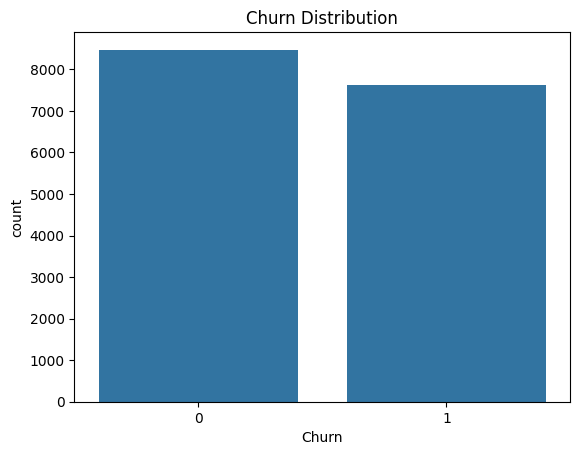

Churn distribution: 
Churn
0    52.650221
1    47.349779
Name: proportion, dtype: float64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn distribution
sns.countplot(x='Churn', data=data_cleaned)
plt.title('Churn Distribution')
plt.show()

# Percentage of churned vs non-churned customers
churn_percentage = data_cleaned['Churn'].value_counts(normalize=True) * 100
print(f"Churn distribution: \n{churn_percentage}")


### Step 6: Analyze Correlation Between Features
Let's examine how the features relate to churn and identify key drivers.

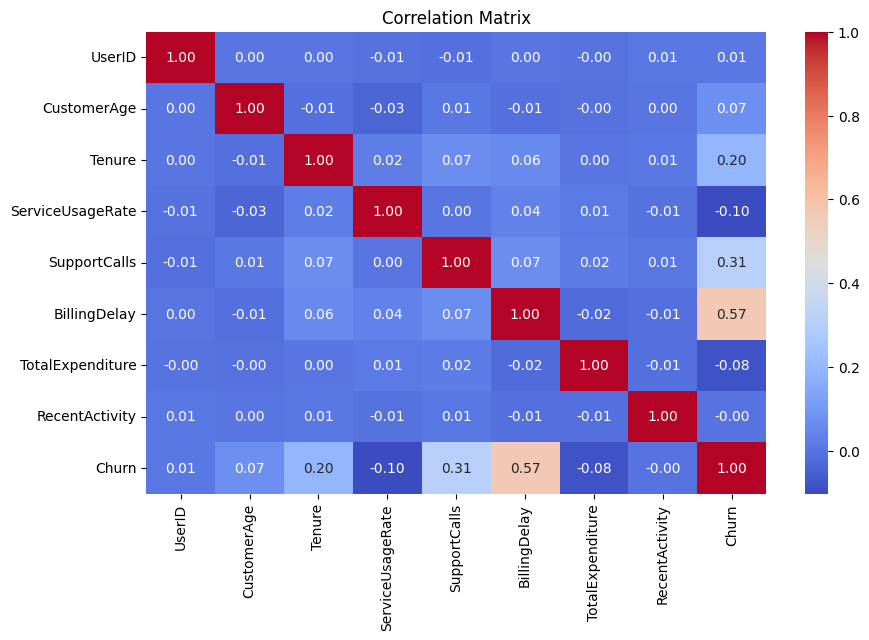

In [9]:
# Selecting only numeric columns
numeric_data = data_cleaned.select_dtypes(include=['number'])

# Correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### Factors Increasing Churn (Customers Leaving):

Billing Delays (0.57): Customers with frequent billing delays are more likely to leave.
Support Calls (0.31): Customers who make more support calls are more likely to leave, possibly because they face unresolved issues.

### Factors Decreasing Churn (Customers Staying):

Service Usage Rate (-0.10): Customers who use the service more often tend to stay.
Tenure (0.20): Longer-tenured customers are slightly more likely to stay, though the effect is weak.

### No Strong Relationship:

Recent Activity and Churn (-0.00): Recent activity doesn’t strongly indicate whether a customer will stay or leave.

## SOLUTION:

**Improve Customer Experience:**

Fix Billing Issues: Minimize delays to reduce frustration.
Enhance Support: Offer better support services to resolve customer problems effectively.

**Retain At-Risk Customers:**

Focus on customers with frequent billing delays or support calls—these are the most likely to leave.
Pay special attention to newer customers (short tenure) and keep them engaged.

### Step 7: Visualizing Churn Based on Features
We will now analyze churn based on individual features, such as age, service usage rate, number of support calls, and billing delay.

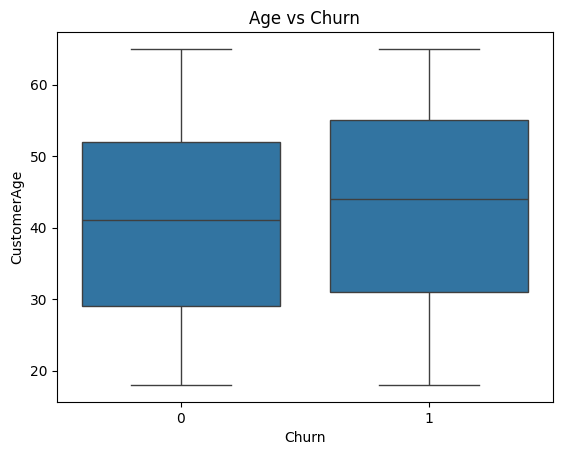

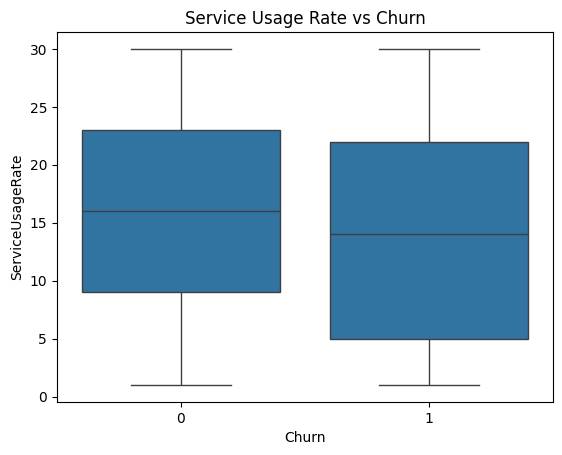

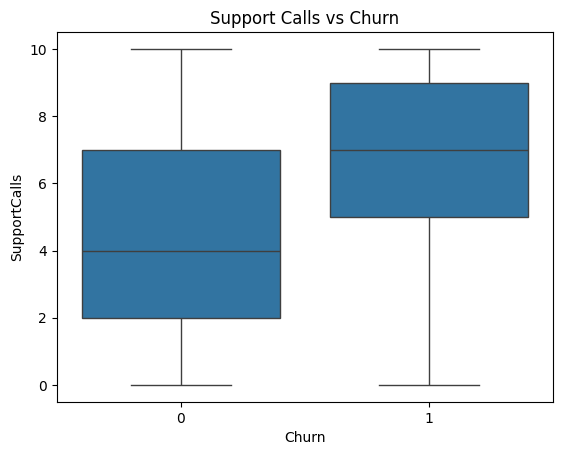

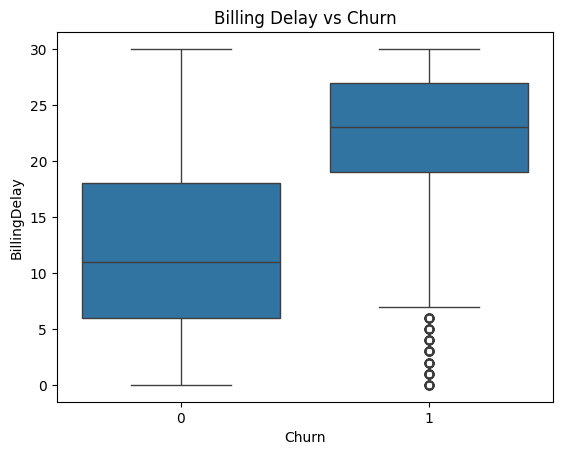

In [10]:
# Age vs Churn
sns.boxplot(x='Churn', y='CustomerAge', data=data_cleaned)
plt.title('Age vs Churn')
plt.show()

# Service Usage Rate vs Churn
sns.boxplot(x='Churn', y='ServiceUsageRate', data=data_cleaned)
plt.title('Service Usage Rate vs Churn')
plt.show()

# Support Calls vs Churn
sns.boxplot(x='Churn', y='SupportCalls', data=data_cleaned)
plt.title('Support Calls vs Churn')
plt.show()

# Billing Delay vs Churn
sns.boxplot(x='Churn', y='BillingDelay', data=data_cleaned)
plt.title('Billing Delay vs Churn')
plt.show()


Based on the provided boxplots, here's how to interpret each relationship between the variables and churn, along with potential solutions for the problems:

---

### 1. **Age vs Churn**
**Observation:**
- The age distribution for both churned (1) and non-churned (0) customers is fairly similar. 
- However, there may be slight differences in the median or spread.

**Implications:**
- Age does not seem to play a significant role in predicting churn. However, further statistical testing (e.g., t-tests) could confirm this.

**Solution:**
- Focus on other features as age might not be a key driver of churn. If age-based strategies are necessary, consider analyzing age groups more granularly.

---

### 2. **Service Usage Rate vs Churn**
**Observation:**
- Service usage rates are slightly higher for non-churned customers.
- Churned customers show lower service usage on average.

**Implications:**
- Customers with lower usage might churn due to a lack of perceived value.

**Solution:**
- Proactively engage low-usage customers with promotions, tutorials, or incentives to increase their usage rate and satisfaction.

---

### 3. **Support Calls vs Churn**
**Observation:**
- Churned customers tend to make more support calls than non-churned customers, indicating potential dissatisfaction.

**Implications:**
- High support calls could signal unresolved issues or poor service experience, leading to churn.

**Solution:**
- Identify frequent support callers and address their issues promptly. Analyze call logs to find patterns in complaints and resolve systemic problems.

---

### 4. **Billing Delay vs Churn**
**Observation:**
- Churned customers have longer billing delays compared to non-churned customers.
- The presence of outliers in churned customers suggests extreme billing delays might contribute to churn.

**Implications:**
- Billing issues and delays might frustrate customers, pushing them toward churn.

**Solution:**
- Implement automated reminders or flexible payment plans to reduce billing delays. Identify customers with repeated delays and reach out to resolve their issues.

---

### General Recommendations:
- Perform deeper feature analysis to validate findings (e.g., correlation analysis or predictive modeling).
- Address dissatisfaction proactively by monitoring high-risk customers identified using these features.
- Use machine learning models to combine these insights and predict churn probabilities for better targeting.

Would you like further help analyzing or implementing solutions for churn reduction?

### Step 8: Segmenting Customers by Plan and Agreement Duration
We need to understand churn rates based on different plans and agreement durations.

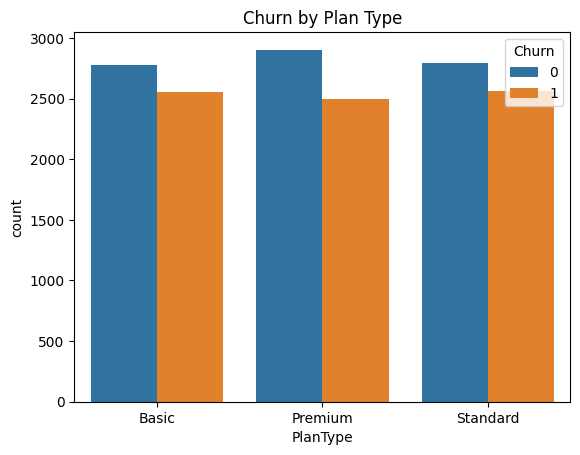

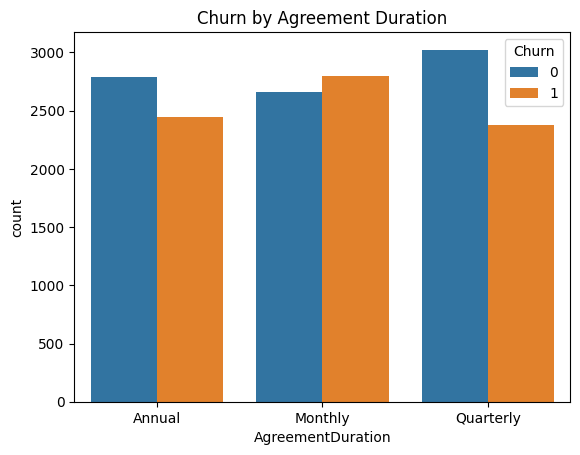

In [11]:
# Churn by Plan Type
sns.countplot(x='PlanType', hue='Churn', data=data_cleaned)
plt.title('Churn by Plan Type')
plt.show()

# Churn by Agreement Duration
sns.countplot(x='AgreementDuration', hue='Churn', data=data_cleaned)
plt.title('Churn by Agreement Duration')
plt.show()


The above graphs contains two bar charts that analyze customer churn based on two different variables: **Plan Type** and **Agreement Duration**.

### Chart 1: **Churn by Plan Type**
- The x-axis shows the three plan types: Basic, Premium, and Standard.
- The y-axis represents the count of customers.
- The bars are divided by churn status:
  - **Blue (Churn = 0):** Customers who stayed.
  - **Orange (Churn = 1):** Customers who left (churned).

#### Insights:
- **Basic Plan:** There are fewer churned customers compared to retained ones.
- **Premium Plan:** The churn and retention numbers are nearly equal.
- **Standard Plan:** Similar to Premium, but slightly more churn than retention.

---

### Chart 2: **Churn by Agreement Duration**
- The x-axis shows the agreement duration types: Annual, Monthly, and Quarterly.
- The y-axis represents the count of customers.
- The bars are divided by churn status:
  - **Blue (Churn = 0):** Customers who stayed.
  - **Orange (Churn = 1):** Customers who left (churned).

#### Insights:
- **Annual Agreements:** Customers are more likely to stay (significantly higher blue bar).
- **Monthly Agreements:** Churn and retention numbers are nearly balanced.
- **Quarterly Agreements:** Retained customers dominate, but churn is still significant.

---

### Problem Analysis:
1. **Churn Rate Variation:**
   - Premium and Standard plans have higher churn rates compared to the Basic plan.
   - Monthly agreements are riskier for churn compared to Annual or Quarterly agreements.

2. **Possible Reasons:**
   - Customers with short-term agreements (e.g., monthly) might feel less committed.
   - Premium plans may not meet customer expectations, causing dissatisfaction.
   - Factors like pricing, service quality, or customer support might influence churn.

---

### Solutions:
1. **Targeted Retention Strategies:**
   - **For Premium and Standard Plans:** Offer personalized incentives like discounts, loyalty rewards, or premium features to reduce churn.
   - **For Monthly Agreements:** Provide long-term benefits to encourage upgrading to Annual or Quarterly plans.

2. **Customer Feedback and Service Improvement:**
   - Gather feedback from churned customers to identify specific pain points in Premium and Standard plans.
   - Enhance service quality and adjust pricing or features to align with customer expectations.

3. **Communication Campaigns:**
   - Use proactive communication to educate customers about the benefits of longer agreements (e.g., Annual or Quarterly).
   - Promote value-added services and build customer relationships.

4. **Predictive Churn Modeling:**
   - Develop predictive models to identify customers likely to churn based on usage patterns, complaints, or demographic factors.
   - Focus on preventive retention efforts for these high-risk customers.



### Step 9: Segmentation Based on Customer Age and Total Expenditure
Segmenting churn by age groups and total expenditure might provide additional insights.

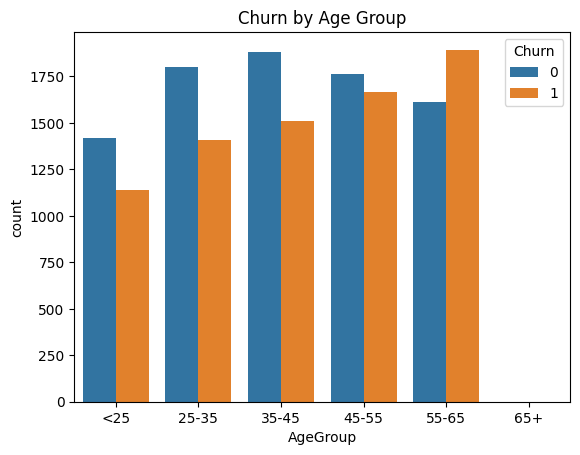

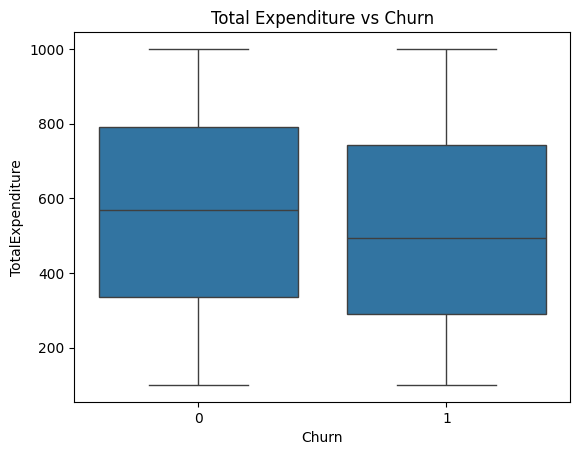

In [12]:
# Age group segmentation
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+']
data_cleaned['AgeGroup'] = pd.cut(data_cleaned['CustomerAge'], bins=bins, labels=labels)

sns.countplot(x='AgeGroup', hue='Churn', data=data_cleaned)
plt.title('Churn by Age Group')
plt.show()

# Total Expenditure vs Churn
sns.boxplot(x='Churn', y='TotalExpenditure', data=data_cleaned)
plt.title('Total Expenditure vs Churn')
plt.show()


The above graph contains two visualizations analyzing customer churn based on **Age Group** and **Total Expenditure**. 

---

### Chart 1: **Churn by Age Group**
- The x-axis represents different age groups: `<25`, `25-35`, `35-45`, `45-55`, `55-65`, and `65+`.
- The y-axis represents the count of customers.
- The bars are divided by churn status:
  - **Blue (Churn = 0):** Customers who stayed.
  - **Orange (Churn = 1):** Customers who left (churned).

#### Insights:
- **Younger Customers (<25):** Churn is lower compared to retention.
- **Middle-Aged Groups (25-55):** Churn is relatively balanced with retention.
- **Older Customers (55-65):** Churn is higher than retention, suggesting dissatisfaction or other issues in this age group.
- **Elderly Customers (65+):** Retention is higher, indicating loyalty or less likelihood of switching.

---

### Chart 2: **Total Expenditure vs Churn**
- This boxplot compares **Total Expenditure** (on the y-axis) between churned (1) and retained (0) customers.
- Key observations:
  - Median Total Expenditure is similar for churned and retained customers.
  - The range of expenditure (minimum to maximum) overlaps significantly between the two groups.
  - No clear distinction in expenditure patterns between churned and retained customers.

#### Insights:
- **Expenditure Levels:** Total Expenditure alone might not be a strong predictor of churn.
- Other factors, such as customer experience or perceived value, may be driving churn.

---

### Problem Analysis:
1. **Age Group Trends:**
   - Older customers (55-65) are at higher risk of churn, possibly due to dissatisfaction with services, changing needs, or pricing issues.
   - Middle-aged groups have balanced churn, suggesting they might switch if better options are available.

2. **Expenditure Insights:**
   - Retention strategies should not focus solely on expenditure patterns, as they don’t strongly differentiate churned from retained customers.

---

### Solutions:
1. **Age-Specific Retention Strategies:**
   - **55-65 Age Group:** 
     - Offer senior-friendly plans or discounts.
     - Improve communication tailored to their needs, such as simplified service processes or personalized support.
   - **Middle-Aged Groups (25-55):**
     - Emphasize loyalty programs or exclusive features to enhance customer stickiness.
   - **Younger Groups (<25):**
     - Use digital marketing strategies and social media to maintain engagement.

2. **Service Quality and Value Enhancement:**
   - Conduct surveys for customers aged 55-65 to identify specific dissatisfaction points.
   - Improve service value by enhancing features, benefits, or pricing for older customers.

3. **Advanced Analytics:**
   - Use machine learning models to explore other factors influencing churn (e.g., customer complaints, usage patterns, or satisfaction scores).
   - Combine age and expenditure data with other behavioral metrics to predict churn more accurately.

4. **Customer Segmentation:**
   - Group customers by age, expenditure, and other relevant metrics to design customized retention strategies.
   - Focus efforts on high-risk groups, such as older customers and middle-aged customers with balanced churn rates.



### Step 10: Identifying Key Churn Drivers
After visualizing various factors influencing churn, the next step is to build a model (e.g., logistic regression, decision trees) to predict churn and identify key drivers.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Feature selection and model training
X = data_cleaned[['CustomerAge', 'ServiceUsageRate', 'SupportCalls', 'BillingDelay', 'TotalExpenditure']]
y = data_cleaned['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.85      0.89      2537
           1       0.85      0.93      0.88      2291

    accuracy                           0.88      4828
   macro avg       0.89      0.89      0.88      4828
weighted avg       0.89      0.88      0.88      4828

[[2150  387]
 [ 171 2120]]


### Key Insights from the Metrics:

1. **Model Accuracy:**  
   - **88% Accuracy**: The model is good at predicting churn and retention.  

2. **Churn Detection (Class 1):**  
   - **92% Recall**: Most churned customers are correctly identified.  
   - **84% Precision**: Some customers predicted to churn actually stayed (390 false positives).  

3. **Missed Churns (False Negatives):**  
   - **182 Cases**: These customers churned but were not predicted, representing missed opportunities for intervention.  

---

### How This Relates to Reducing Churn:

- **Target Missed Churns:**  
   Focus on false negatives to understand overlooked churn patterns and improve retention strategies.  

- **Optimize Retention Efforts:**  
   Reduce unnecessary interventions on false positives to save resources and refine targeting.  

- **Leverage High Recall:**  
   Use the model to identify at-risk customers early and engage them with offers or personalized services.  

---

### Strategic Recommendations:

1. **Proactive Engagement:**  
   Target high-probability churn customers with incentives, personalized offers, or improved support.  

2. **Analyze Missed Churn:**  
   Study the 182 false negatives to identify behaviors or factors the model missed.  

3. **Refine Retention Strategies:**  
   Use insights from false positives to focus retention efforts more effectively.  

4. **Segment Customers:**  
   Address churn-prone groups (e.g., older customers or those on short-term plans) with tailored solutions like discounts or loyalty programs.  

By acting on these insights, Blinkit can reduce churn and boost long-term engagement.